In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-cifar10-dataset/cifar-10-batches-py/data_batch_1
/kaggle/input/the-cifar10-dataset/cifar-10-batches-py/data_batch_2
/kaggle/input/the-cifar10-dataset/cifar-10-batches-py/batches.meta
/kaggle/input/the-cifar10-dataset/cifar-10-batches-py/test_batch
/kaggle/input/the-cifar10-dataset/cifar-10-batches-py/data_batch_3
/kaggle/input/the-cifar10-dataset/cifar-10-batches-py/data_batch_5
/kaggle/input/the-cifar10-dataset/cifar-10-batches-py/data_batch_4
/kaggle/input/the-cifar10-dataset/cifar-10-batches-py/readme.html


# **Step 1: Import Necessary Libraries**

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import pickle

dataset_path = '/kaggle/input/the-cifar10-dataset/cifar-10-batches-py'


# **Step 2: Load CIFAR-10 Data from Batches**

In [17]:
def load_batch(fpath):
    with open(fpath, 'rb') as f:
        d = pickle.load(f, encoding='bytes')
        data = d[b'data']
        labels = d[b'labels']
        data = data.reshape(data.shape[0], 3, 32, 32)
        data = data.transpose(0, 2, 3, 1)
        return data, labels


train_data = []
train_labels = []
for i in range(1, 6):
    data, labels = load_batch(os.path.join(dataset_path, f'data_batch_{i}'))
    train_data.append(data)
    train_labels.append(labels)

train_data = np.concatenate(train_data)
train_labels = np.concatenate(train_labels)


test_data, test_labels = load_batch(os.path.join(dataset_path, 'test_batch'))

train_data, test_data = train_data / 255.0, test_data / 255.0
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)


# **Step 3: Data Augmentation and Preprocessing**

In [18]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)
datagen.fit(train_data)


# **Step 4: Building the Convolutional Neural Network (CNN)**

In [19]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Adding Dropout to handle overfitting
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# **Step 5: Training the Model**

In [20]:
train_generator = datagen.flow(train_data, train_labels, batch_size=64, subset='training')
validation_generator = datagen.flow(train_data, train_labels, batch_size=64, subset='validation')

# Train the model
history = model.fit(train_generator, 
                    epochs=10, 
                    validation_data=validation_generator)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 74ms/step - accuracy: 0.1872 - loss: 2.1320 - val_accuracy: 0.3536 - val_loss: 1.7136
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.3367 - loss: 1.7843 - val_accuracy: 0.4178 - val_loss: 1.5818
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.3909 - loss: 1.6645 - val_accuracy: 0.4607 - val_loss: 1.4764
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.4234 - loss: 1.5820 - val_accuracy: 0.4896 - val_loss: 1.4056
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.4499 - loss: 1.5147 - val_accuracy: 0.5000 - val_loss: 1.3812
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 74ms/step - accuracy: 0.4692 - loss: 1.4754 - val_accuracy: 0.5136 - val_loss: 1.3375
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - accuracy: 0.4890 - loss: 1.4333 - val_accuracy: 0.5213 - val_loss: 1.3175
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 73ms/step - accuracy: 0.4966 - loss: 1.4048 - 

# **Step 6: Model Evaluation and Fine-Tuning**

313/313 - 2s - 8ms/step - accuracy: 0.5937 - loss: 1.1394
Test accuracy: 0.5936999917030334


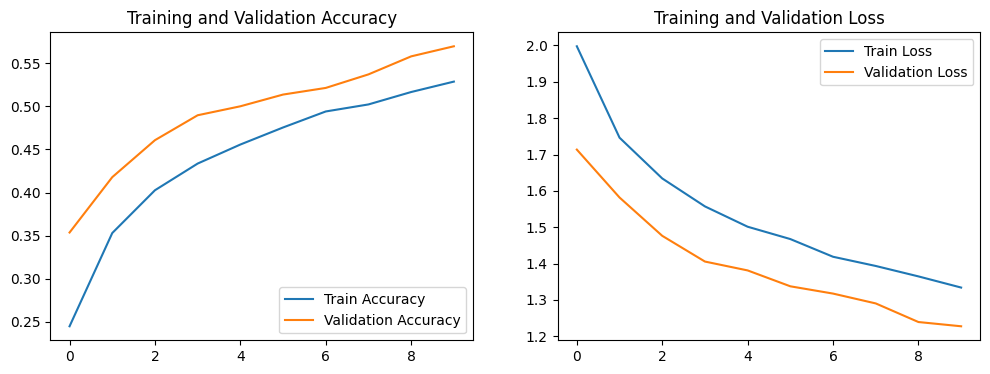

In [21]:
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# **Step 7: Handling Overfitting**

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_generator, 
                    epochs=10, 
                    validation_data=validation_generator, 
                    callbacks=[early_stopping])


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 74ms/step - accuracy: 0.1712 - loss: 2.2620 - val_accuracy: 0.3054 - val_loss: 1.8441
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.2942 - loss: 1.9034 - val_accuracy: 0.3671 - val_loss: 1.7642
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.3441 - loss: 1.8158 - val_accuracy: 0.3904 - val_loss: 1.6933
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.3690 - loss: 1.7699 - val_accuracy: 0.4145 - val_loss: 1.6564
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.3876 - loss: 1.7255 - val_accuracy: 0.4459 - val_loss: 1.5973
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.4046 - loss: 1.7005 - val_accuracy: 0.4529 - val_loss: 1.5723
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.4145 - loss: 1.6756 - val_accuracy: 0.4389 - val_loss: 1.5895
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.4261 - loss: 1.6558 - 